In [2]:
# Plot dei risultati a partire dal csv generato da run_cpp_hydra.py con assi x = thread, y = tempo di esecuzione

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import os
from matplotlib.ticker import ScalarFormatter


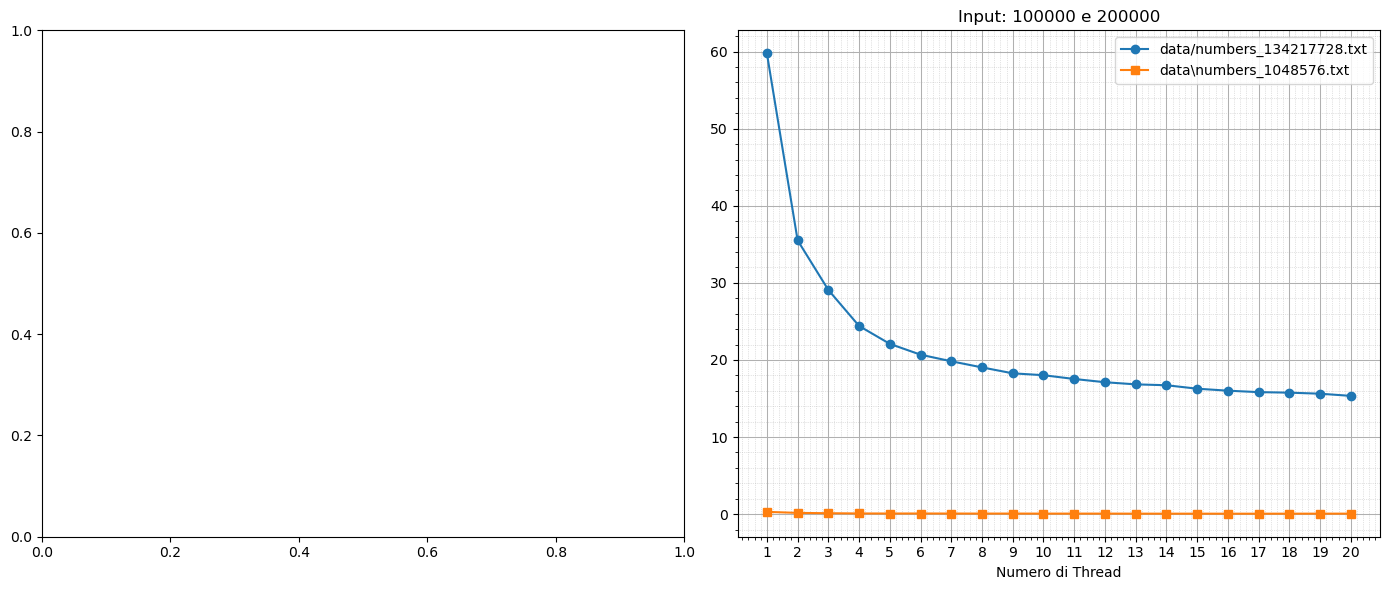

In [16]:
# 1) Carica i dati
df = pd.read_csv("durata_fft.csv")
df = df[df["Eseguibile"] == "OMP_FFT.exe"]

df["Media Tempo di Esecuzione (s)"] = df["Durata FFT (ms)"] / 1000

# 2) Crea la figura con due subplot affiancati
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# 3) Marker
markers = ['o', 's', '^', 'd', 'v', 'x', 'P', '*', 'h', '+']


# 4b) Secondo subplot: 100000 e 200000
large_inputs = df[df["File di input"].isin(["data\\numbers_1048576.txt", "data/numbers_134217728.txt"])]
for i, (name, group) in enumerate(large_inputs.groupby("File di input")):
    m = markers[i % len(markers)]
    axs[1].plot(
        group["Threads"],
        group["Media Tempo di Esecuzione (s)"],
        marker=m,
        linestyle='-',
        label=name
    )
axs[1].set_title("Input: 100000 e 200000")
axs[1].set_xlabel("Numero di Thread")
axs[1].legend()
axs[1].yaxis.set_major_formatter(ScalarFormatter())
axs[1].ticklabel_format(style='plain', axis='y')
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_minor_locator(MultipleLocator(0.5))
axs[1].grid(True, which='major', linestyle='-', linewidth=0.75)
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)
axs[1].minorticks_on()

# 5) Spaziatura e mostra
plt.tight_layout()
plt.show()
